In [1]:
pip install imbalanced-learn

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



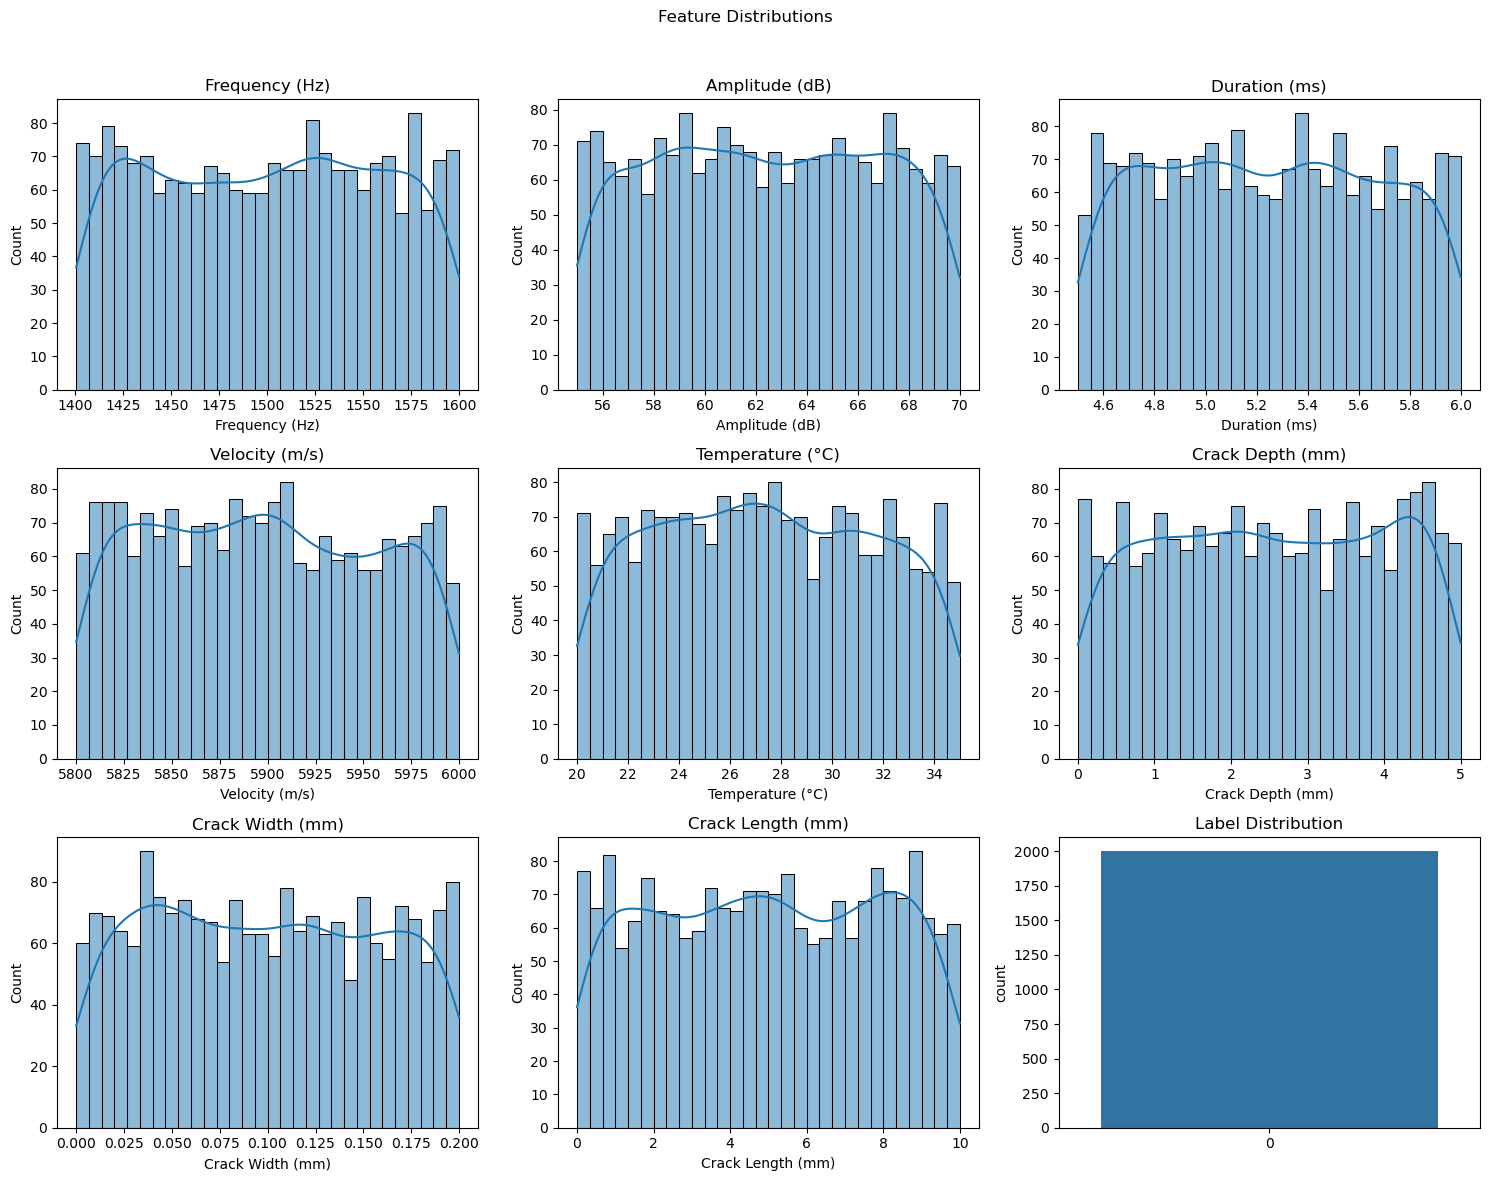

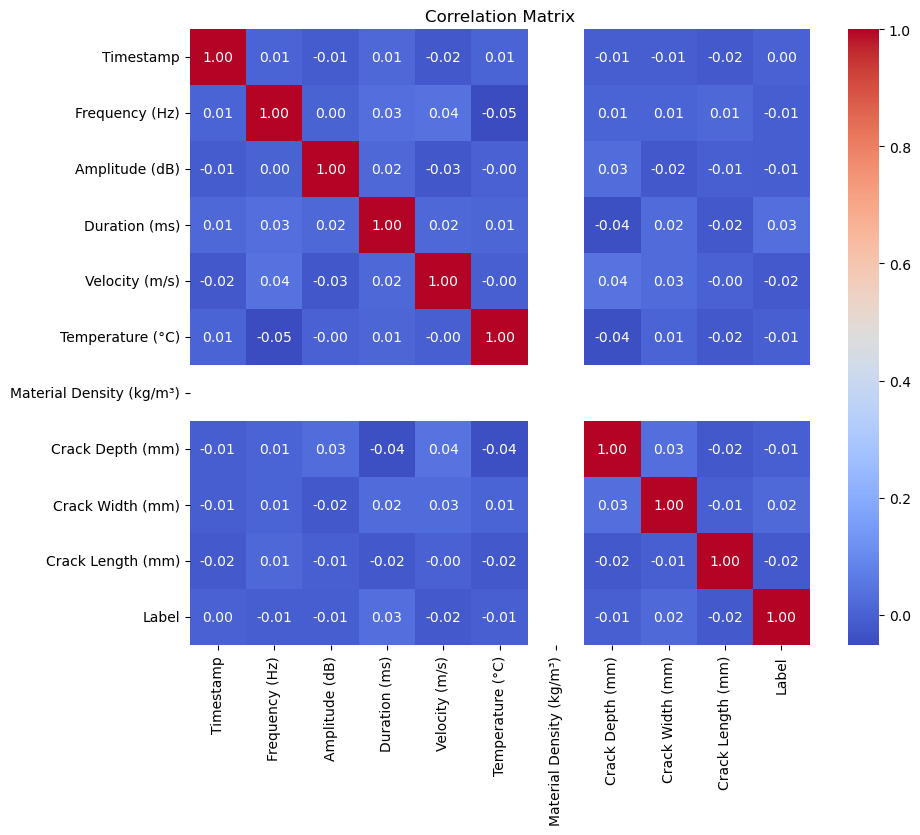

Accuracy: 0.6960431654676259
              precision    recall  f1-score   support

           0       0.69      0.71      0.70       275
           1       0.71      0.68      0.69       281

    accuracy                           0.70       556
   macro avg       0.70      0.70      0.70       556
weighted avg       0.70      0.70      0.70       556



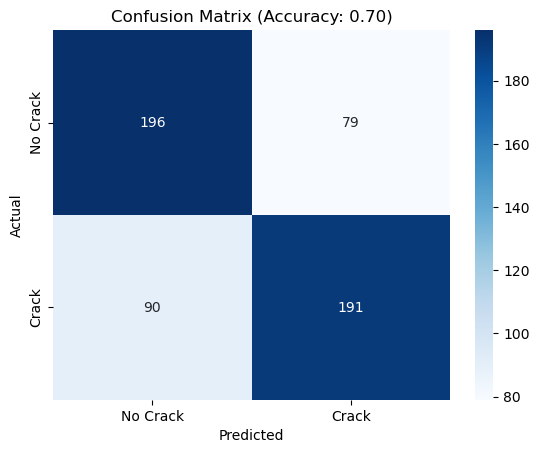

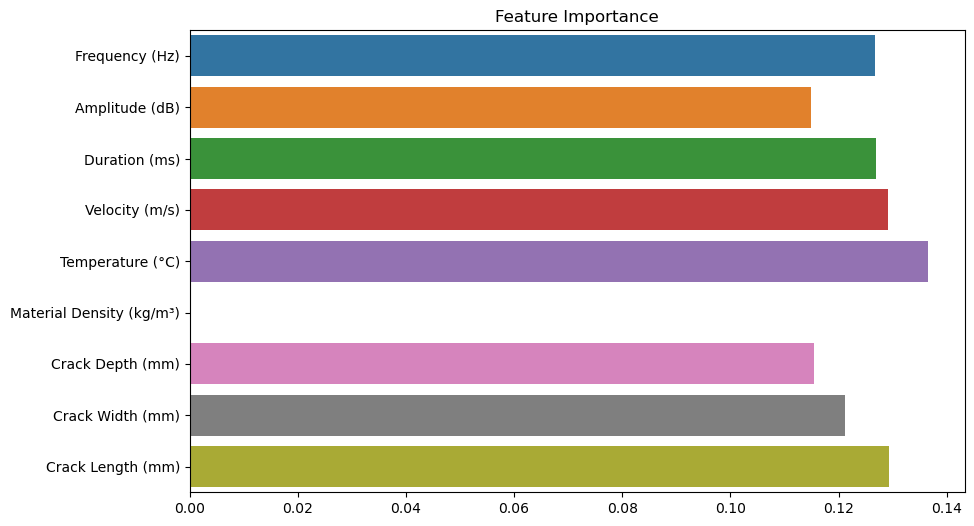

Prediction for new data: No Crack


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Load the dataset
df = pd.read_csv('acoustic_wave_iron_rod.csv')

# Visualizing distributions of features
fig, axs = plt.subplots(3, 3, figsize=(15, 12))
fig.suptitle('Feature Distributions')

sns.histplot(df['Frequency (Hz)'], ax=axs[0, 0], kde=True, bins=30).set_title('Frequency (Hz)')
sns.histplot(df['Amplitude (dB)'], ax=axs[0, 1], kde=True, bins=30).set_title('Amplitude (dB)')
sns.histplot(df['Duration (ms)'], ax=axs[0, 2], kde=True, bins=30).set_title('Duration (ms)')
sns.histplot(df['Velocity (m/s)'], ax=axs[1, 0], kde=True, bins=30).set_title('Velocity (m/s)')
sns.histplot(df['Temperature (°C)'], ax=axs[1, 1], kde=True, bins=30).set_title('Temperature (°C)')
sns.histplot(df['Crack Depth (mm)'], ax=axs[1, 2], kde=True, bins=30).set_title('Crack Depth (mm)')
sns.histplot(df['Crack Width (mm)'], ax=axs[2, 0], kde=True, bins=30).set_title('Crack Width (mm)')
sns.histplot(df['Crack Length (mm)'], ax=axs[2, 1], kde=True, bins=30).set_title('Crack Length (mm)')
sns.countplot(df['Label'], ax=axs[2, 2]).set_title('Label Distribution')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# Plot correlation matrix
plt.figure(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Define features (X) and target (y)
X = df[['Frequency (Hz)', 'Amplitude (dB)', 'Duration (ms)', 'Velocity (m/s)', 
        'Temperature (°C)', 'Material Density (kg/m³)', 'Crack Depth (mm)', 
        'Crack Width (mm)', 'Crack Length (mm)']]

y = df['Label']

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

# Split the resampled data into training and test sets
X_train_res, X_test_res, y_train_res, y_test_res = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

# Train a Random Forest Classifier on the resampled data
clf_res = RandomForestClassifier(n_estimators=100, random_state=42)
clf_res.fit(X_train_res, y_train_res)

# Make predictions on the test set
y_pred_res = clf_res.predict(X_test_res)

# Evaluate the model
accuracy_res = accuracy_score(y_test_res, y_pred_res)
conf_matrix = confusion_matrix(y_test_res, y_pred_res)
classification_rep_res = classification_report(y_test_res, y_pred_res)

# Print accuracy and classification report
print(f'Accuracy: {accuracy_res}')
print(classification_rep_res)

# Plot confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['No Crack', 'Crack'], yticklabels=['No Crack', 'Crack'])
plt.title(f'Confusion Matrix (Accuracy: {accuracy_res:.2f})')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Feature Importance
feature_importance = clf_res.feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance, y=features)
plt.title('Feature Importance')
plt.show()

# Predicting for new test data (you can replace with actual test data)
new_data = [[1000, 75, 12, 800, 30, 7800, 2.5, 0.1, 15]]  # Replace with actual values
prediction = clf_res.predict(new_data)
print(f'Prediction for new data: {"Crack" if prediction[0] == 1 else "No Crack"}')